This notebook demonstrates basic operations of creating sample records (using the fake sample generator), adding them to a PQG graph, retrieving records from the graph, and visualizing the graph.

In [1]:
import logging
from isamples import *
from isamples import fake_samples

# Create an in-memory instance of PQG
g = createGraph()

In [2]:
fake_samples.make_fakes(g, count=5)

In [3]:
import json
import pyperclip
data = g.getNode("msr_1")
print(json.dumps(data, indent=2, cls=pqg.JSONDateTimeEncoder))


{
  "pid": "msr_1",
  "label": "amount",
  "last_modified_time": "2014-02-19 15:40:56.099223",
  "description": "Pass behavior race toward entire. Record economic tree same course. Draw we social four cup power miss check.",
  "sample_identifier": "msr_1",
  "alternate_identifiers": null,
  "sampling_purpose": "Stand notice coach authority.",
  "complies_with": null,
  "dc_rights": null,
  "produced_by": {
    "pid": "event_3",
    "label": "less",
    "description": "Information world site. Yourself customer move go great.\nAddress man arrive glass such. Hold government including read others project. She art minute expert improve store.",
    "has_feature_of_interest": "part",
    "project": "project-tax",
    "result_time": "1998-11-13T18:05:41",
    "authorized_by": null,
    "responsibility": [
      {
        "pid": "agent_15",
        "name": "Patricia Garrett",
        "affiliation": "Delaware",
        "contact_information": "000 Troy Overpass Suite 264\nMatthewton, NM 42269",


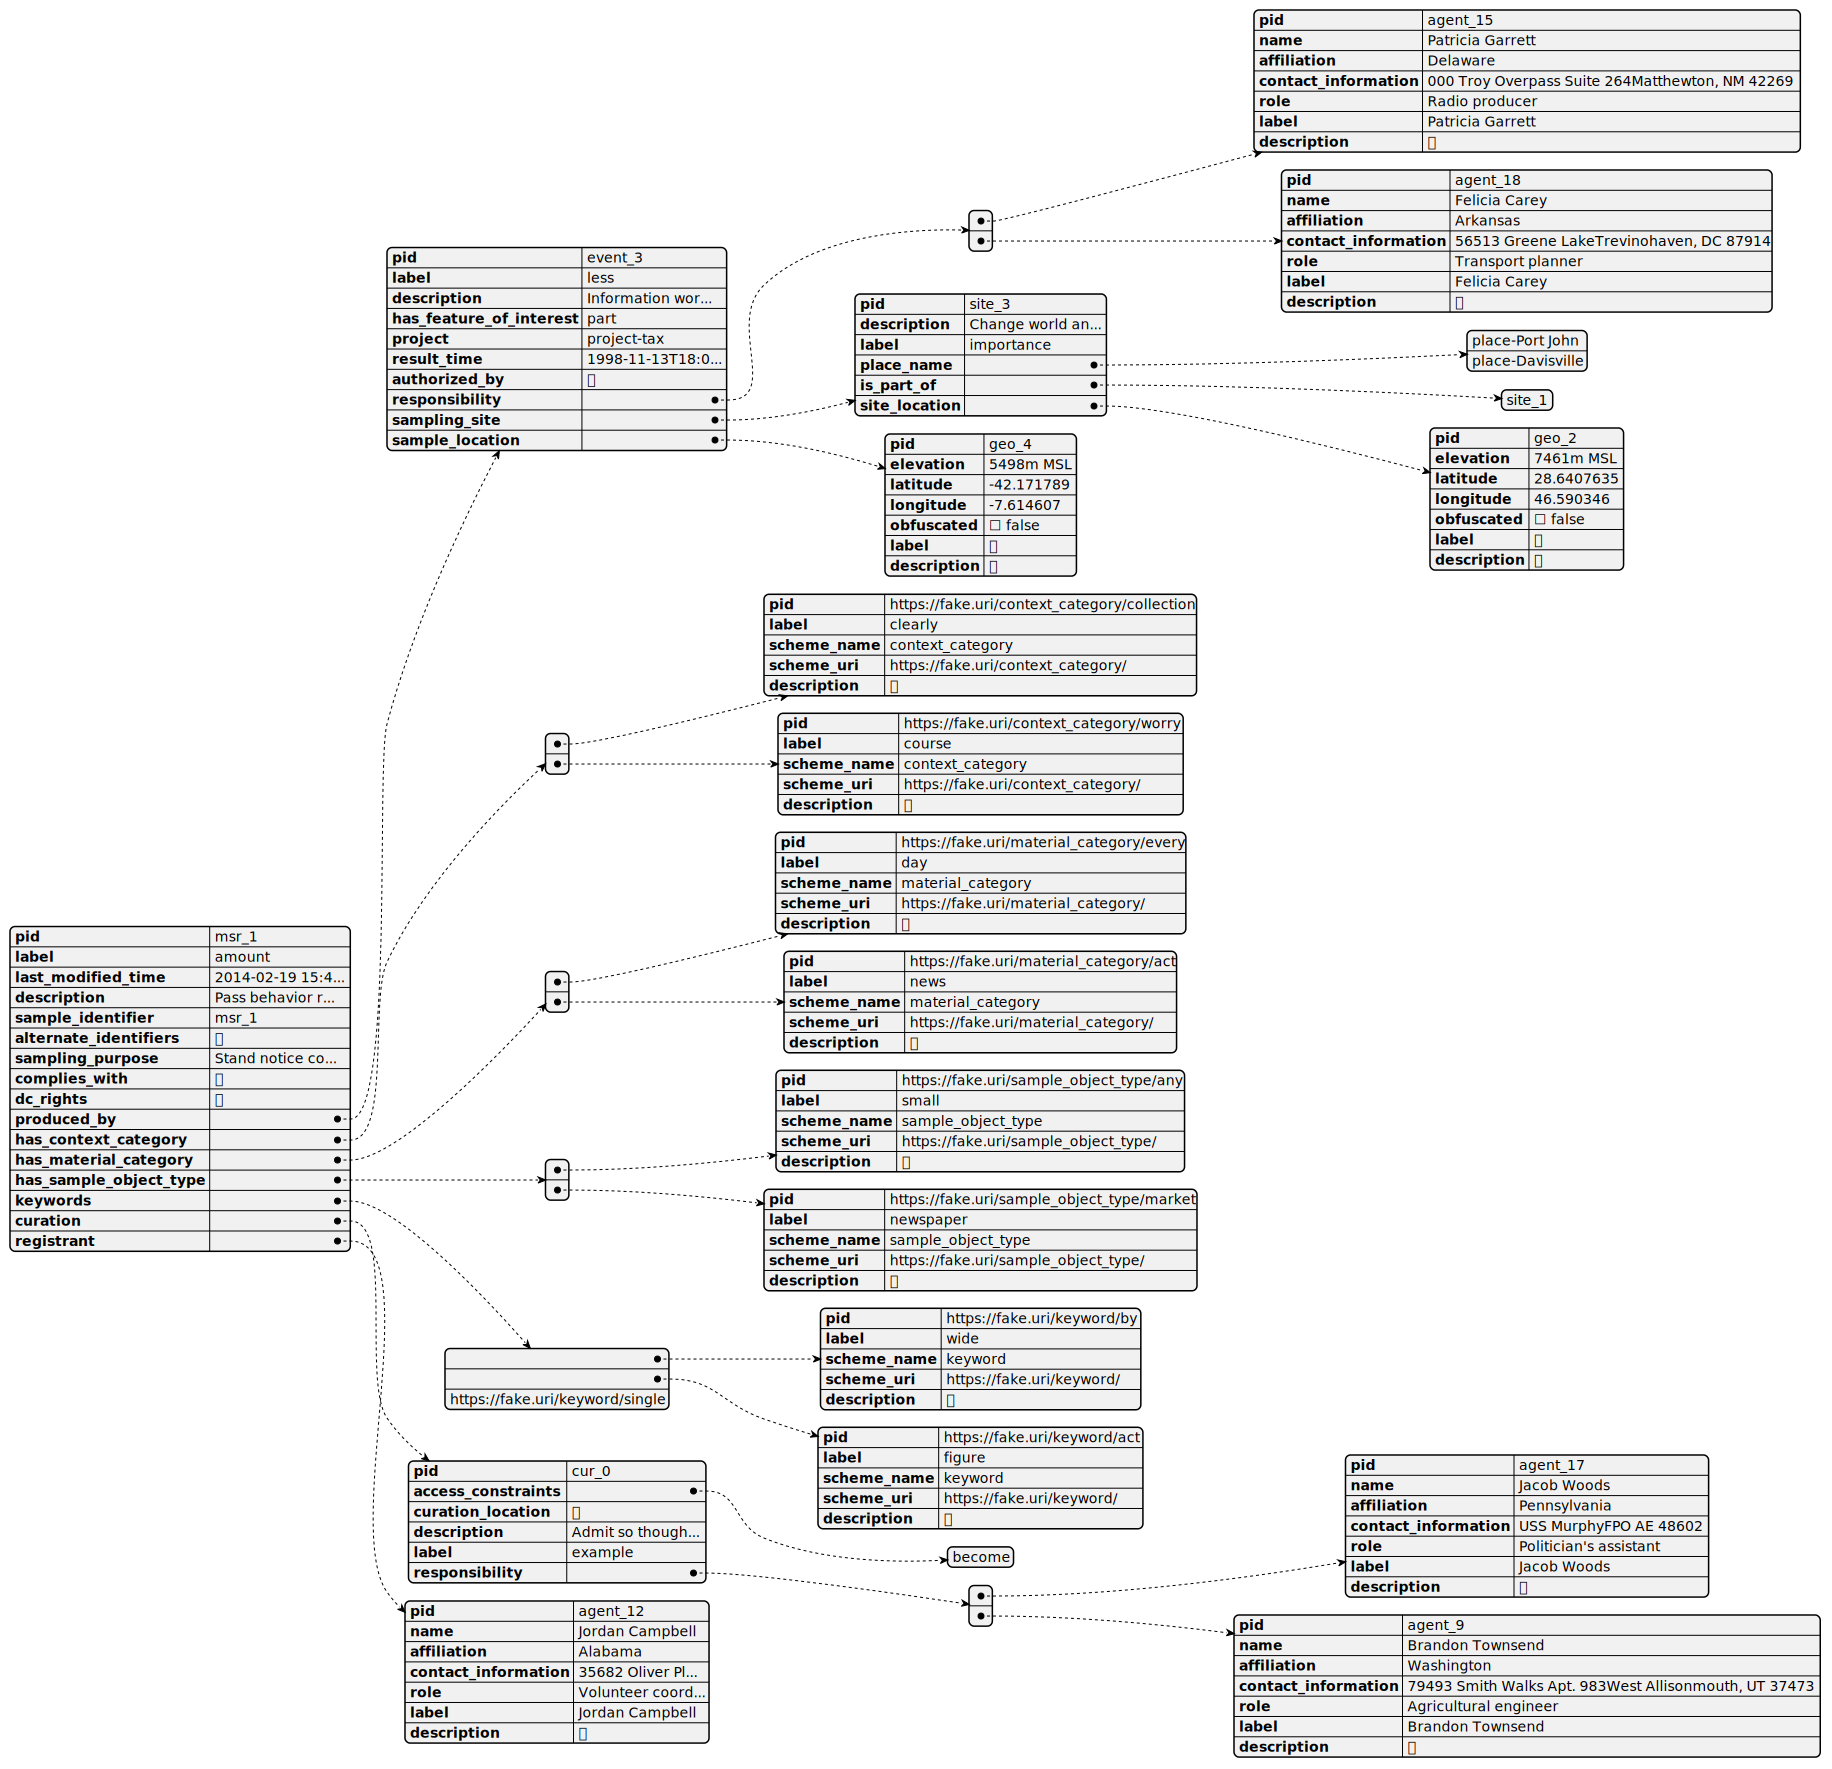

In [5]:
import IPython.display
import plantweb.render
import pqg.common

def shrink_text(o):
    new_o = {}
    for k,v in o.items():
        if isinstance(v, dict):
            new_o[k] = shrink_text(v)
        else:
            if isinstance(v, str):
                if len(v) > 15:
                    new_o[k] = v[:15] + "..."
                else:
                    new_o[k] = v
            else:
                new_o[k] = v
    return new_o


def displayPlantuml(content):
    _svg = plantweb.render.render(
                content,
                engine="plantuml",
                format="svg",
                cacheopts={"use_cache":False},
                server="http://localhost:2080/",
            )
    IPython.display.display(
        IPython.display.SVG(
            _svg[0]
        )
    )

pyperclip.copy(f"@startjson\n{json.dumps(shrink_text(data), indent=2, cls=pqg.JSONDateTimeEncoder)}\n@endjson")

displayPlantuml(f"@startjson\n{json.dumps(shrink_text(data), indent=2, cls=pqg.JSONDateTimeEncoder)}\n@endjson")

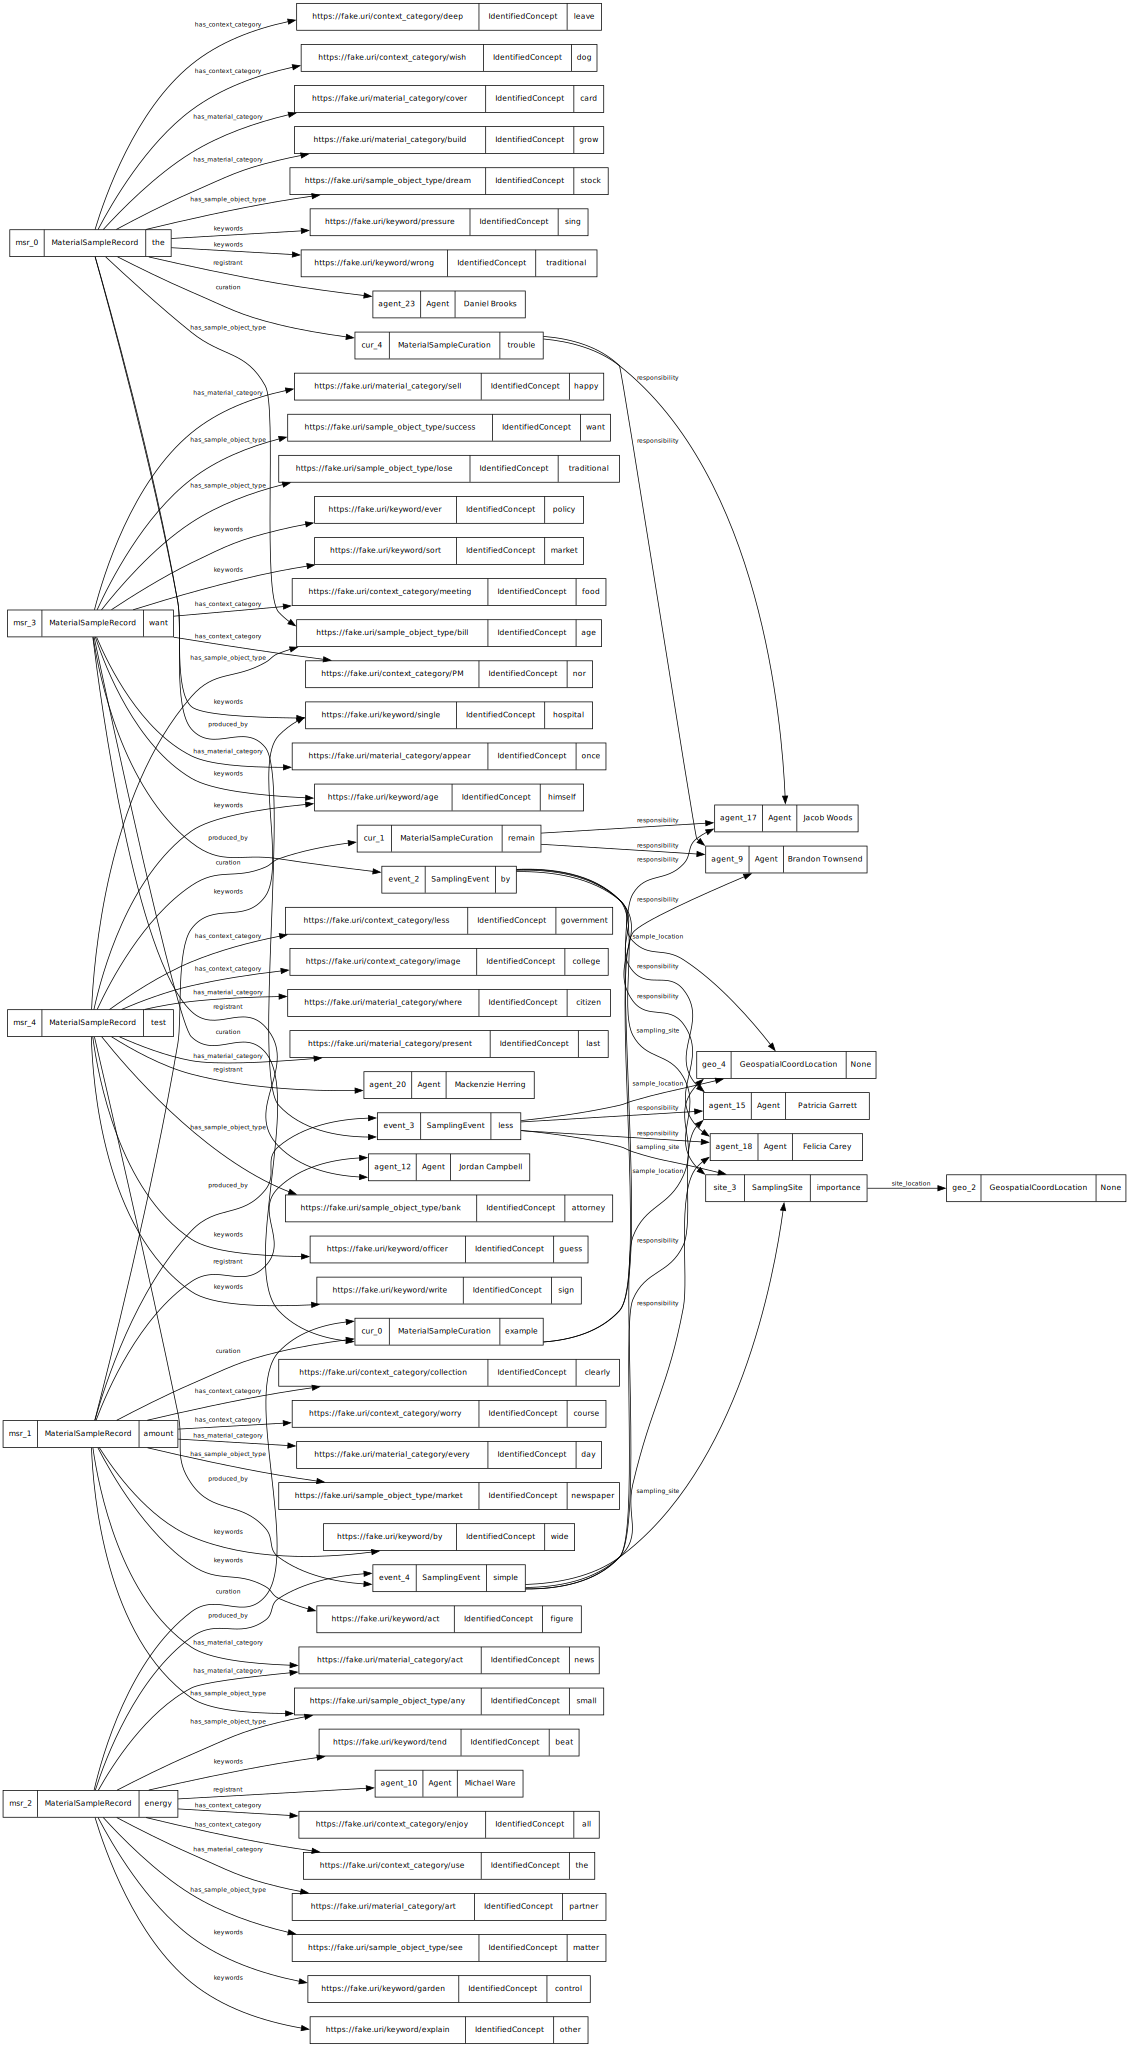

In [6]:
import IPython.display
import graphviz

dot = "\n".join(g.toGraphviz(rankdir="LR"))
pyperclip.copy(dot)
gv = graphviz.Source(dot)
IPython.display.display(gv)

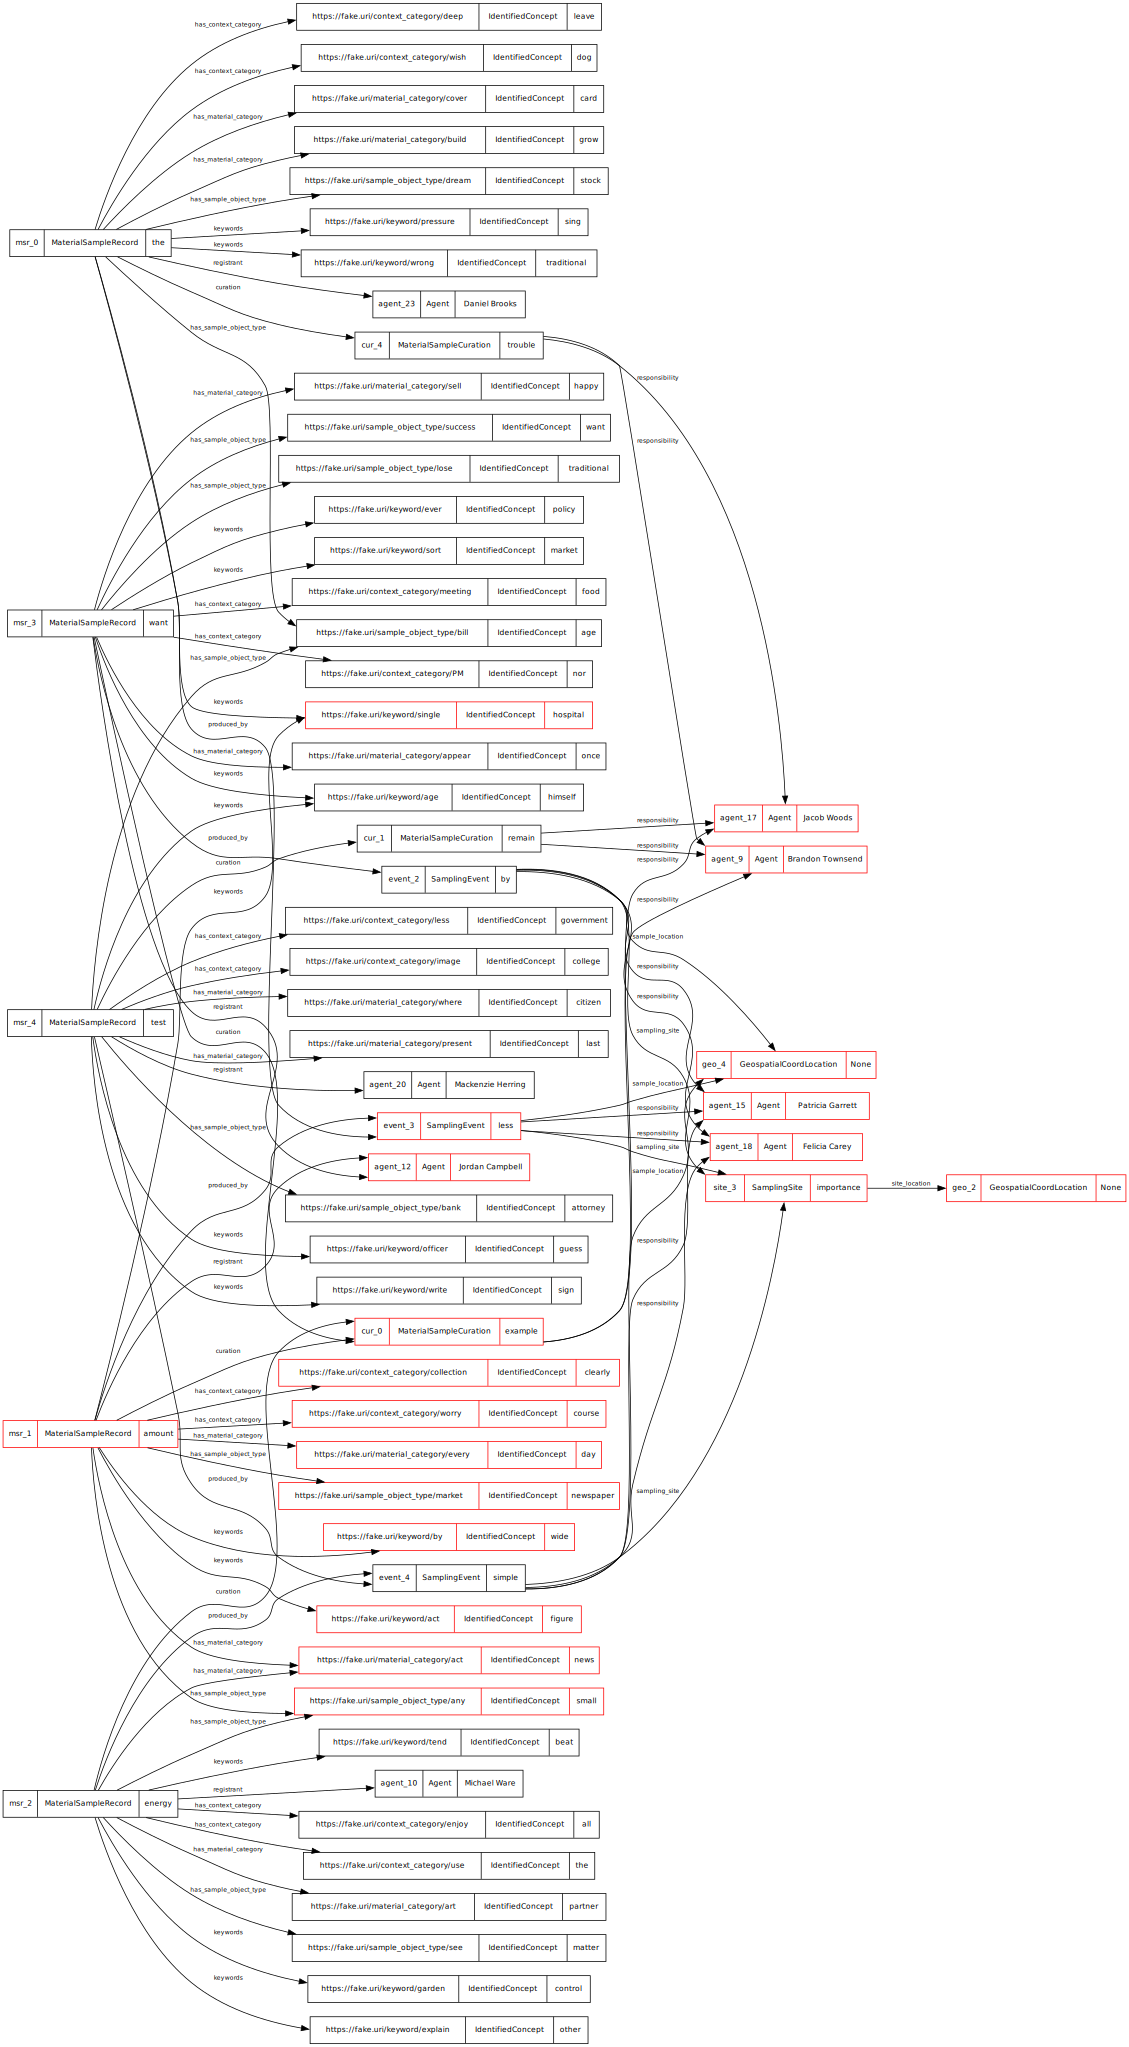

In [7]:
selected = g.getNodeIds("msr_1")
dot = "\n".join(g.toGraphviz(nlights=selected))
pyperclip.copy(dot)
gv = graphviz.Source(dot)
IPython.display.display(gv)